**Importing necessary libraries**

In [117]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**LOADING Movie Review DATASET**

In [118]:
data=pd.read_csv('./movie_review.csv',sep='\t',encoding='latin-1')

In [119]:
data.head(5)

,id,review,sentiment
0,5814_8,With all this stuff going down at the moment w...,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0
3,3630_4,It must be assumed that those who praised this...,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1


**DATASET INFORMATION**

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [121]:
#Distribution of positive(1.0) and negative sentiment(0.0) in the dataset
data['sentiment'].value_counts()

sentiment
1    11278
0    11222
Name: count, dtype: int64

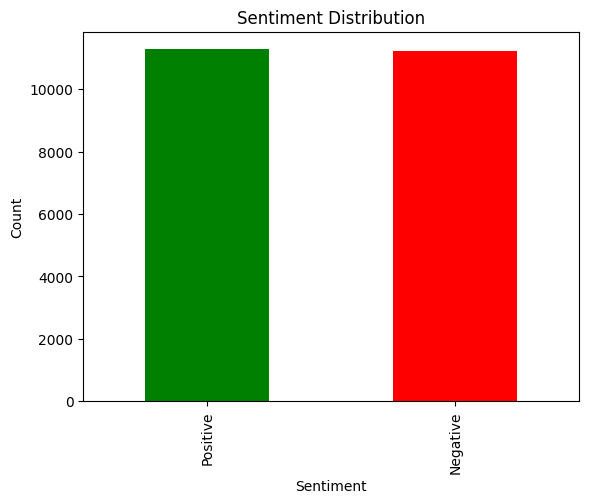

In [122]:
#Sentiment distribution
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**DATA PREPROCESSING**

In [123]:
#Checking for any null values
data.isnull().sum()

id           0
review       0
sentiment    0
dtype: int64

In [124]:
#Removing null values from the dataset
data=data.dropna()

In [125]:
#Feature variable
X=data['review' ]
#Target variable
y=data['sentiment']

**Applying Stemming and removing stopwords, numerical and special characters**

In [126]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(X)):
  review=re.sub("[^a-zA-Z]"," ",X[i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
  review= " ".join(review)
  corpus.append(review)

In [127]:
tfidf=TfidfVectorizer(max_features=6000)
X_new=tfidf.fit_transform(corpus).toarray()

In [128]:
tfidf.get_feature_names_out()

array(['abandon', 'abc', 'abduct', ..., 'zone', 'zoom', 'zorro'],
      dtype=object)

In [129]:
X_new.shape

(22500, 6000)

**Splitting Dataset into Training and Testing**

In [130]:
#Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25)

In [131]:
print("Size of Training set:",X_train.shape)

Size of Training set: (16875, 6000)


In [132]:
print("Size of testing set:",X_test.shape)

Size of testing set: (5625, 6000)


**Naive Bayes Classifier**

In [133]:
mnb=MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [134]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=0.5)

In [135]:
y_pred_mnb=mnb.predict(X_test)

In [136]:
print("Accuracy score for Multinomial Naive Bayes model :-", accuracy_score(y_test, y_pred_mnb))

Accuracy score for Multinomial Naive Bayes model :- 0.8544


In [137]:
print("Confusion matrix for Multinomial Naive Bayes model :-")
print(confusion_matrix(y_test, y_pred_mnb))

Confusion matrix for Multinomial Naive Bayes model :-
[[2371  410]
 [ 409 2435]]


In [138]:
print("Classification report for Multinomial Naive Bayes model :-")
print(classification_report(y_test, y_pred_mnb))

Classification report for Multinomial Naive Bayes model :-
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2781
           1       0.86      0.86      0.86      2844

    accuracy                           0.85      5625
   macro avg       0.85      0.85      0.85      5625
weighted avg       0.85      0.85      0.85      5625



**Logistic Regression**

In [139]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500, random_state=42)

In [140]:
y_pred_lr=lr.predict(X_test)

In [141]:
print("Accuracy score for Logistic regression model :-",accuracy_score(y_test,y_pred_lr))

Accuracy score for Logistic regression model :- 0.8867555555555555


In [142]:
print("Confusion matrix for logistic regression model :-")
print(confusion_matrix(y_test,y_pred_lr))

Confusion matrix for logistic regression model :-
[[2444  337]
 [ 300 2544]]


In [143]:
print("Classification report for logistic regression model :-")
print(classification_report(y_test,y_pred_lr))

Classification report for logistic regression model :-
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2781
           1       0.88      0.89      0.89      2844

    accuracy                           0.89      5625
   macro avg       0.89      0.89      0.89      5625
weighted avg       0.89      0.89      0.89      5625



**Support Vector Machine**

In [144]:
svc = SVC(kernel='rbf',C=1,random_state=42)
svc.fit(X_train,y_train)

SVC(C=1, random_state=42)

In [145]:
y_pred_svc=svc.predict(X_test)

In [146]:
print("Accuracy score for SVM model:",accuracy_score(y_test,y_pred_svc))

Accuracy score for SVM model: 0.8931555555555556


In [147]:
print("Confusion matrix for SVM model :-")
print(confusion_matrix(y_test,y_pred_svc))

Confusion matrix for SVM model :-
[[2461  320]
 [ 281 2563]]


In [148]:
print("Classification report for SVM model :-")
print(classification_report(y_test,y_pred_svc))

Classification report for SVM model :-
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2781
           1       0.89      0.90      0.90      2844

    accuracy                           0.89      5625
   macro avg       0.89      0.89      0.89      5625
weighted avg       0.89      0.89      0.89      5625



**K-Means Clustering (Not Preferred)**

In [149]:
'''KMeans Clustering is implemented for this sentiment analysis problem only because
it was mentioned in the Task Allocation Document although KMeans clustering doesn't make
any sense for this sentiment analysis problem hence it is not preferred.'''
km=KMeans(n_clusters=2)
km.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [150]:
y_pred_km=km.predict(X_test)

In [151]:
print("Accuracy score for K-Means Clustering model:",accuracy_score(y_test,y_pred_km))

Accuracy score for K-Means Clustering model: 0.5155555555555555


In [152]:
print("Confusion matrix for K-Means Clustering model :-")
print(confusion_matrix(y_test,y_pred_km))

Confusion matrix for K-Means Clustering model :-
[[1097 1684]
 [1041 1803]]


In [153]:
print("Classification report for K-Means Clustering model :-")
print(classification_report(y_test,y_pred_km))

Classification report for K-Means Clustering model :-
              precision    recall  f1-score   support

           0       0.51      0.39      0.45      2781
           1       0.52      0.63      0.57      2844

    accuracy                           0.52      5625
   macro avg       0.52      0.51      0.51      5625
weighted avg       0.52      0.52      0.51      5625

